# NEUB CSE-432 Spring 2025 Lab 11

## Task 1
Design of a Low-Pass filter using Sinc function.

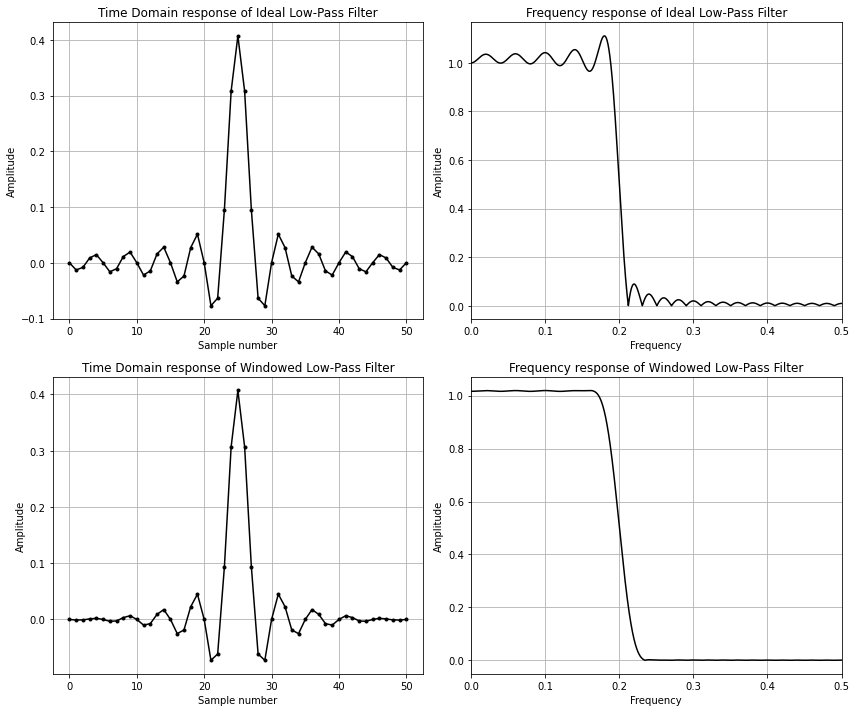

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N = 51  # Filter length
n = np.arange(N)
fc = 0.2  # Normalized cutoff frequency 
h_lp = np.sinc(2 * fc * (n - (N - 1) / 2))  # Ideal Low Pass Filter
h_lp /= np.sum(h_lp)   # Normalize

h_lp_windowed =h_lp* np.hamming(N)  # Apply window to reduce sidelobes

# Frequency responses
w, H_lp = freqz(h_lp, worN=8000)
w2, H_lp_W = freqz(h_lp_windowed, worN=8000)


# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(h_lp, 'k.-')
plt.title("Time Domain response of Ideal Low-Pass Filter")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(w / (2 * np.pi), abs(H_lp), 'k')
plt.title("Frequency response of Ideal Low-Pass Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.subplot(2, 2, 3)
plt.plot(h_lp_windowed, 'k.-')
plt.title("Time Domain response of Windowed Low-Pass Filter")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(w2 / (2 * np.pi), abs(H_lp_W), 'k')
plt.title("Frequency response of Windowed Low-Pass Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.tight_layout()
plt.show()

## Task 2
Creating High-Pass Filetr by Spectral Inversion of Low-Pass Filter

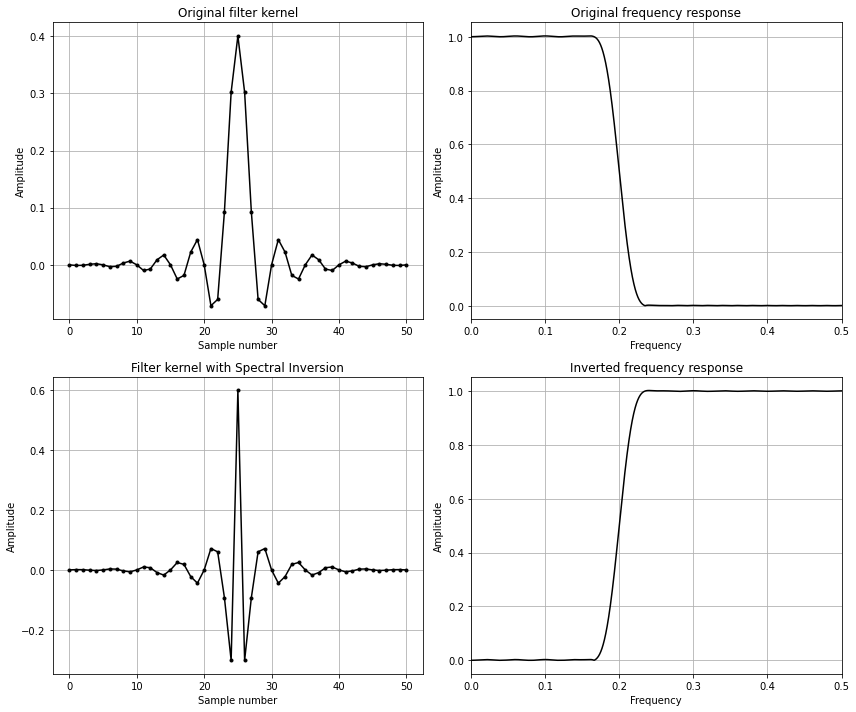

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz


N = 51  # Filter length (odd number is necessary for spectral inversion)
n = np.arange(N)
fc = 0.2  # Normalized cutoff frequency 
h_lp = np.sinc(2 * fc * (n - (N - 1) / 2))  # Ideal Low Pass Filter
h_lp *= np.hamming(N)  # Apply window to reduce sidelobes
h_lp /= np.sum(h_lp)   # Normalize

# Spectral Inversion to create high-pass filter
h_hp = -h_lp #Invert the values
h_hp[(N - 1) // 2] += 1  # Add delta at center

# Frequency responses
w, H_lp = freqz(h_lp, worN=8000)
w2, H_hp = freqz(h_hp, worN=8000)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(h_lp, 'k.-')
plt.title("Original filter kernel")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(w / (2 * np.pi), abs(H_lp), 'k')
plt.title("Original frequency response")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.subplot(2, 2, 3)
plt.plot(h_hp, 'k.-')
plt.title("Filter kernel with Spectral Inversion")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(w2 / (2 * np.pi), abs(H_hp), 'k')
plt.title("Inverted frequency response")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.tight_layout()
plt.show()

## Task 3
Creating High-Pass Filetr by Spectral Reversal of Low-Pass Filter

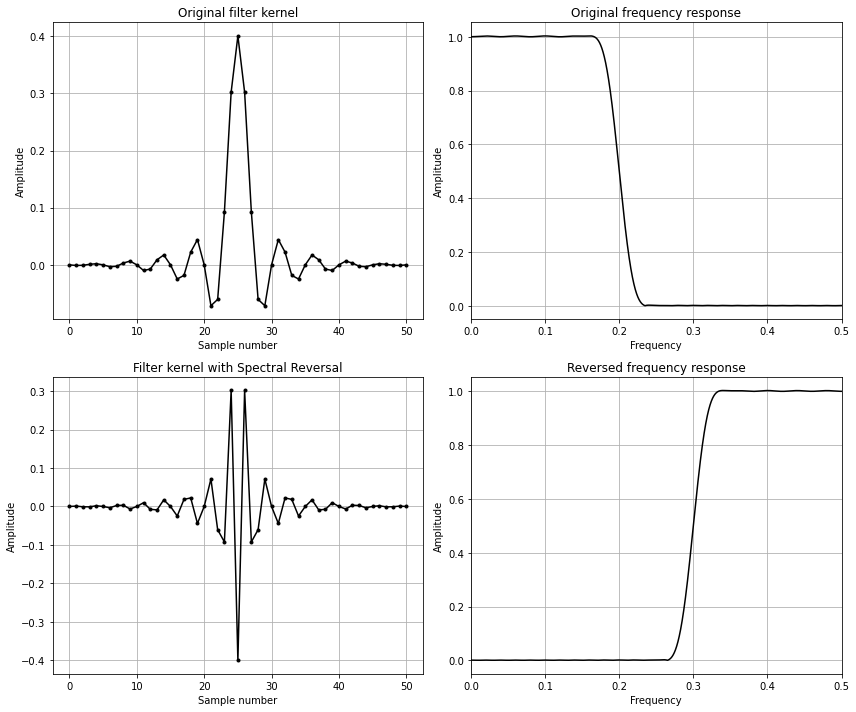

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz


N = 51  # Filter length (odd number is necessary for spectral inversion)
n = np.arange(N)
fc = 0.2  # Normalized cutoff frequency 
h_lp = np.sinc(2 * fc * (n - (N - 1) / 2))  # Ideal Low Pass Filter
h_lp *= np.hamming(N)  # Apply window to reduce sidelobes
h_lp /= np.sum(h_lp)   # Normalize

# Spectral Reversal to create high-pass filter
h_hp = h_lp * (-1) ** n

# Frequency responses
w, H_lp = freqz(h_lp, worN=8000)
w2, H_hp = freqz(h_hp, worN=8000)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(h_lp, 'k.-')
plt.title("Original filter kernel")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(w / (2 * np.pi), abs(H_lp), 'k')
plt.title("Original frequency response")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.subplot(2, 2, 3)
plt.plot(h_hp, 'k.-')
plt.title("Filter kernel with Spectral Reversal")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(w2 / (2 * np.pi), abs(H_hp), 'k')
plt.title("Reversed frequency response")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.5)

plt.tight_layout()
plt.show()

## Task 4
Combinig two Low-Pass Filter to form Band-Pass Filter

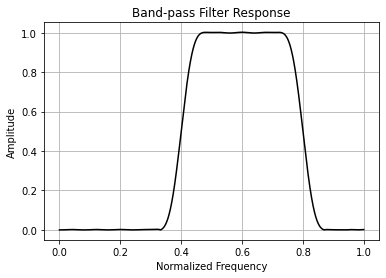

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N = 51  # Filter length
n = np.arange(N)

# Cutoff frequencies
f1 = 0.2 
f2 = 0.4 

# Create low-Pass Filters
h_lp1 = np.sinc(2 * f1 * (n - (N - 1) / 2)) * np.hamming(N)
h_lp2 = np.sinc(2 * f2 * (n - (N - 1) / 2)) * np.hamming(N)

# Normalize
h_lp1 /= np.sum(h_lp1)
h_lp2 /= np.sum(h_lp2)

# Band-Pass by Subtraction
h_bp = h_lp2 - h_lp1

# Frequency response
w, H_bp = freqz(h_bp, worN=8000)

# Plot
plt.figure()
plt.plot(w/np.pi, abs(H_bp), 'k-')
plt.title('Band-pass Filter Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Task 5
Combinig Low-Pass Filter and High-Pass Filter to form Band-Pass Filter

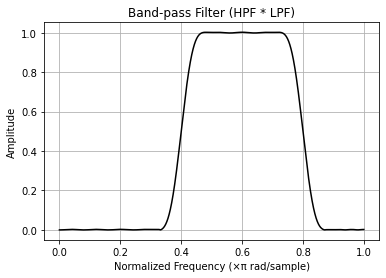

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N = 51  # Filter length (odd)
n = np.arange(N)

# Cutoff frequencies. Ensure f1 is less than f2
f1 = 0.2
f2 = 0.4 

# High-pass filter by spectral inversion of LPF with cutoff f1
h_lp1 = np.sinc(2 * f1 * (n - (N - 1) / 2)) * np.hamming(N)
h_lp1 /= np.sum(h_lp1)
h_hp = -h_lp1
h_hp[N // 2] += 1 

# Low-pass filter with cutoff f2
h_lp2 = np.sinc(2 * f2 * (n - (N - 1) / 2)) * np.hamming(N)
h_lp2 /= np.sum(h_lp2)

# Convolve to get band-pass
h_bp = np.convolve(h_hp, h_lp2, mode='same')

# Frequency response
w, H_bp = freqz(h_bp, worN=8000)

# Plot
plt.figure()
plt.plot(w/np.pi, abs(H_bp), 'k-')
plt.title('Band-pass Filter (HPF * LPF)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Task 6
Combinig Low-Pass Filter and High-Pass Filter to form Band-Reject Filter

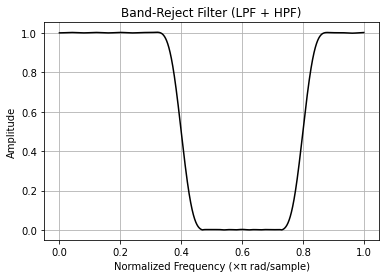

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N = 51  # Filter length (odd)
n = np.arange(N)

# Cutoff frequencies. Ensure f1 is less than f2
f1 = 0.2
f2 = 0.4 

# High-pass filter by spectral inversion of LPF with cutoff f2
h_lp1 = np.sinc(2 * f2 * (n - (N - 1) / 2)) * np.hamming(N)
h_lp1 /= np.sum(h_lp1)
h_hp = -h_lp1
h_hp[N // 2] += 1 

# Low-pass filter with cutoff f1
h_lp2 = np.sinc(2 * f1 * (n - (N - 1) / 2)) * np.hamming(N)
h_lp2 /= np.sum(h_lp2)

# Add to get band-reject
h_br = h_lp2 + h_hp

# Frequency response
w, H_br = freqz(h_br, worN=8000)

# Plot
plt.figure()
plt.plot(w/np.pi, abs(H_br), 'k-')
plt.title('Band-Reject Filter (LPF + HPF)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()